In [2]:
import numpy as np
from multiprocessing.dummy import Pool as ThreadPool
import subprocess
import os
import sys
import glob
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [3]:
ccmd = "bin/runner"

def run_parasim(i):
    ccmd = "bin/runner"
    proc = subprocess.Popen(ccmd,shell=True,stdout=subprocess.PIPE)
    data = proc.communicate()[0]
    return data

In [4]:
N = 4
my_array = range(N)
pool = ThreadPool(4)
results = pool.map(run_parasim, my_array)

In [5]:
l = 100
nx = 16
ny = 16
A = []

for i in range(100):
    start = i*(nx*ny+1) + 1
    stop = (i)*(nx*ny+1) + (nx*ny+1)
    temp = np.zeros((nx,ny))
    for j in range(N):
    #print(np.reshape(data[start:stop],(10,10)))
        data = np.asarray(results[j].split()).astype(float)
        temp = temp + (1.0/N)*np.reshape(data[start:stop],(nx,ny))
    A.append(temp)


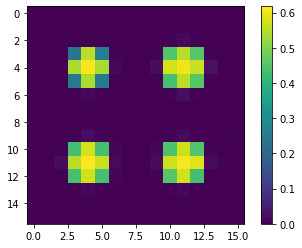

In [6]:
plt.imshow(A[90])
plt.colorbar()

In [7]:
x = np.linspace(0, 1, 16)
y = np.linspace(0, 1, 16)
xx, yy = np.meshgrid(x, y)

In [10]:
trace = go.Heatmap(
    x=x,
    y=y,
    z=A[0]
)

frames = [{
        'data': [{'z': A[i],
                 'type': 'heatmap',
                 'zmin': 0,
                 'zmax':np.max(A)}],
        'layout':go.Layout(title=str(i)+" Years")} for i in range(100)]


layout = dict(
              autosize=False,
              height=600,
              width=600,
              hovermode='closest',
              xaxis=dict(range=[-0.05, 1.05], autorange=False),
              yaxis=dict(range=[-0.05, 1.05], autorange=False),
              showlegend=False,
#              sliders = [sliders_dict],
              updatemenus=[dict(type='buttons', showactive=True,
                                y=1, x=-0.05, xanchor='right',
                                yanchor='top', pad=dict(t=0, r=10),
                                buttons=[dict(label='Play',
                                              method='animate',
                                              args=[None,
                                                    dict(frame=dict(duration=50,
                                                                    redraw=True),
                                                    transition=dict(duration=50),
                                                    fromcurrent=True,
                                                    mode='immediate')]),
                                         dict(label='Pause',
                                              method='animate',
                                              args=[None,
                                                    dict(frame=dict(duration=0,redraw=False),
                                                    transition=dict(duration=0),
                                                    fromcurrent=True,
                                                    mode='immediate')])])])
data=[trace]
fig = go.Figure(data=data, frames=frames, layout=layout)
iplot(fig,"prev_example");
fig